In [23]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

In [61]:
# Importing dataset
Automobile = pd.read_csv(r'C:\Users\ENVY\OneDrive\Documents\Automobile_insurance_fraud.csv')

In [62]:
Automobile.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [63]:
Automobile.shape

(1000, 40)

<Axes: >

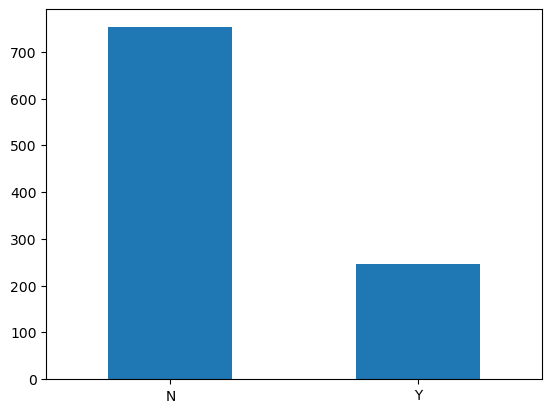

In [64]:
Automobile['fraud_reported'].value_counts().plot(kind='bar', rot=1)

In [65]:
yes = Automobile[Automobile['fraud_reported'] == 'Y']

In [66]:

no = Automobile[Automobile['fraud_reported'] == 'N']

<Axes: title={'center': 'Fraudulent Clients Education'}>

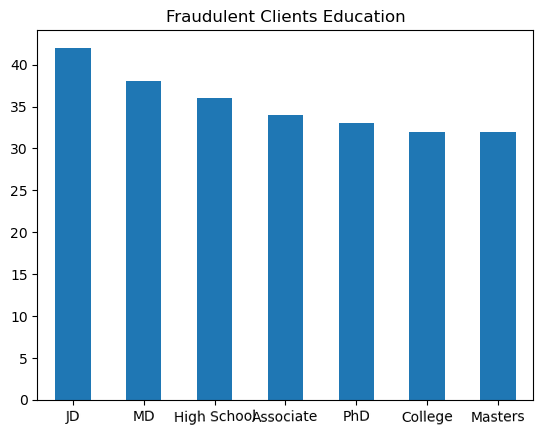

In [67]:
yes['insured_education_level'].value_counts().plot(kind='bar', title= 'Fraudulent Clients Education', x = 'Education', y = 'Count', rot=1)

<Axes: title={'center': 'Non-Fraudulent Clients Education'}>

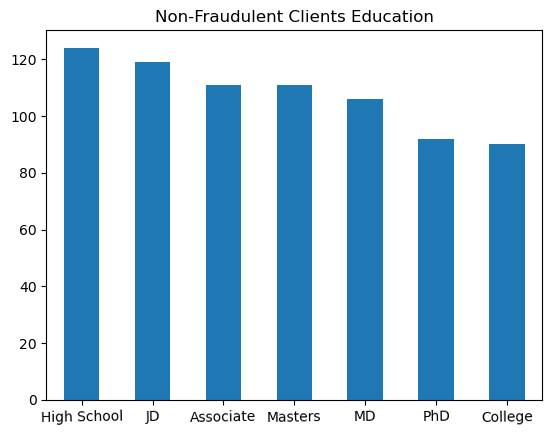

In [68]:
no['insured_education_level'].value_counts().plot(kind='bar', title='Non-Fraudulent Clients Education', x='Education', y='count', rot=1)

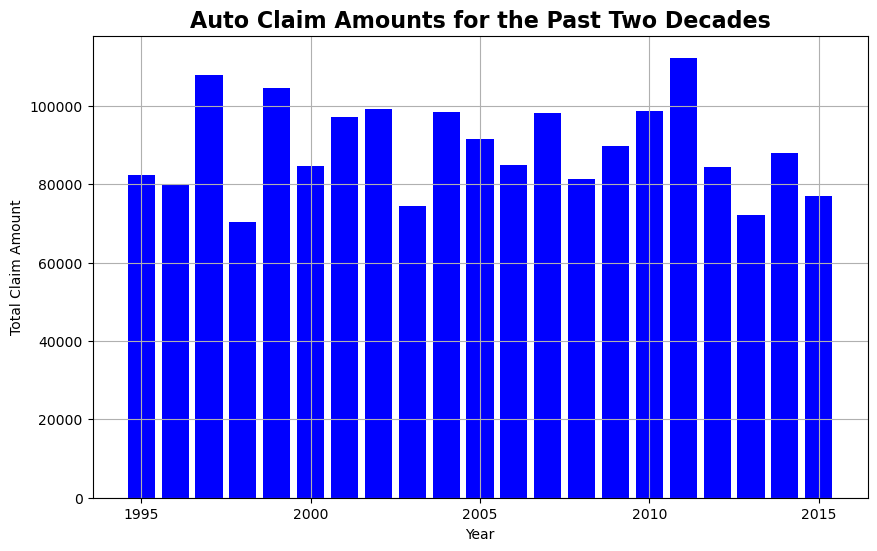

In [69]:
import matplotlib.pyplot as plt

# Assuming 'yes' is your DataFrame
yesSortedYear = yes.sort_values('auto_year')

plt.figure(figsize=(10, 6))
plt.bar(yesSortedYear['auto_year'], yesSortedYear['total_claim_amount'], color='blue')
plt.title('Auto Claim Amounts for the Past Two Decades', fontdict={'fontsize': 16, 'fontweight': 'bold'})
plt.xlabel('Year')
plt.ylabel('Total Claim Amount')
plt.grid(True)
plt.show()

In [70]:
Automobile['incident_state'].value_counts()

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64

In [71]:
Automobile['incident_state_count'] = Automobile['incident_state']

In [73]:
for i in range(len(Automobile['incident_state_count'])):
    if Automobile.iloc[i, 40] == "NY":
        Automobile.iloc[i, 40] = 262
    if Automobile.iloc[i, 40] == "SC":
        Automobile.iloc[i, 40] = 248
    if Automobile.iloc[i, 40] == "WV":
        Automobile.iloc[i, 40] = 217
    if Automobile.iloc[i, 40] == "VA":
        Automobile.iloc[i, 40] = 110
    if Automobile.iloc[i, 40] == "NC":
        Automobile.iloc[i, 40] = 110
    if Automobile.iloc[i, 40] == "PA":
        Automobile.iloc[i, 40] = 30
    if Automobile.iloc[i, 40] == "OH":
        Automobile.iloc[i, 40] = 23

In [74]:
del Automobile['policy_number']
del Automobile['policy_bind_date']
del Automobile['insured_zip']
del Automobile['incident_location']
del Automobile['incident_date']
del Automobile['incident_state_count']

In [75]:

Automobile.dtypes

months_as_customer               int64
age                              int64
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                 object
bodily_injuries                  int64
witnesses                        int64
police_report_available  

In [76]:
Automobile.shape

(1000, 35)

In [77]:
Xdf = Automobile.loc[:,'months_as_customer':'auto_year']

In [78]:
Ydf = df['fraud_reported']
Ydf = Ydf.replace("Y", 1)
Ydf = Ydf.replace("N", 0)
Ydf.dtypes
Xdf.shape

(1000, 33)

In [79]:
convDF = pd.get_dummies(Xdf)

In [80]:
convDF.shape

(1000, 161)

In [81]:
convDF.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,...,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6
0,328,48,1000,1406.91,0,53300,0,5,1,1,...,0,0,0,0,0,0,0,0,0,0
1,228,42,2000,1197.22,5000000,0,0,8,1,0,...,0,0,0,0,0,0,0,0,0,0
2,134,29,2000,1413.14,5000000,35100,0,7,3,2,...,0,1,0,0,0,0,0,0,0,0
3,256,41,2000,1415.74,6000000,48900,-62400,5,1,1,...,0,0,0,0,0,1,0,0,0,0
4,228,44,1000,1583.91,6000000,66000,-46000,20,1,0,...,0,0,1,0,0,0,0,0,0,0


In [82]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [83]:
from scipy.stats import uniform
from sklearn import linear_model, datasets
from sklearn.model_selection import RandomizedSearchCV

In [84]:
def perform_randomized_search(features, target, model, hyperparams, kFolds):
  randomizedsearch = RandomizedSearchCV(model, hyperparams, cv = kFolds, verbose=1)
  best_model = randomizedsearch.fit(features, target)
  print("The mean accuracy of the model is:",best_model.score(features, target))
  print("The best parameters for the model are:",best_model.best_params_)

In [85]:
logistic = linear_model.LogisticRegression(class_weight = 'balanced')
penalty = ['l1', 'l2']
C = np.random.uniform(0, 10, 10000)
hyperparameters = dict(C=C, penalty=penalty)

In [86]:
perform_randomized_search(convDF, Ydf, logistic, hyperparameters, 10)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
The mean accuracy of the model is: 0.567
The best parameters for the model are: {'penalty': 'l2', 'C': 1.2784276210939904}


In [87]:
from sklearn.model_selection import GridSearchCV

def perform_gridsearch(features, target, model, hyperparams, kFolds):
  gridsearch = GridSearchCV(model, hyperparams, cv=kFolds, verbose=1)
  best_model = gridsearch.fit(features, target)
  print("The mean accuracy of the model is:",best_model.score(features, target))
  print("The best parameters for the model are:",best_model.best_params_)

In [88]:

penalty = ['l1', 'l2']
C = np.logspace(0, 10, 20)
hyperparameters = dict(C=C, penalty=penalty)

In [89]:
perform_gridsearch(convDF, Ydf, logistic, hyperparameters, 10)

Fitting 10 folds for each of 40 candidates, totalling 400 fits
The mean accuracy of the model is: 0.569
The best parameters for the model are: {'C': 78475997.03514607, 'penalty': 'l2'}


In [95]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(convDF, Ydf, test_size=0.2, random_state=30)

In [96]:
from sklearn.linear_model import LogisticRegression

# Assuming X_train and y_train are properly defined
logReg = LogisticRegression(C=1.0, penalty='l1', solver='liblinear')
logReg.fit(X_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [97]:
y_pred = logReg.predict(X_test)

In [98]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       154
           1       0.68      0.59      0.63        46

    accuracy                           0.84       200
   macro avg       0.78      0.75      0.76       200
weighted avg       0.83      0.84      0.84       200



In [99]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

## We will include our logistic regression models in addition to RandomForestClassifier and DecisionTreeClassifier

models = [
                {"classifier": [LogisticRegression()],
                 "classifier__penalty": ['l2','l1'],
                 "classifier__C": np.logspace(0, 4, 10)
                 },
                {"classifier": [LogisticRegression()],
                 "classifier__penalty": ['l2'],
                 "classifier__C": np.logspace(0, 4, 10),
                 "classifier__solver":['newton-cg','saga','sag','liblinear']
                 },
                {"classifier": [RandomForestClassifier()],
                 "classifier__n_estimators": [10, 100, 1000],
                 "classifier__max_depth":[5,8,15,25,30,None],
                 "classifier__min_samples_leaf":[1,2,5,10,15,100],
                 "classifier__max_leaf_nodes": [2, 5,10]},
                {"classifier": [DecisionTreeClassifier()],
                 "classifier__splitter":['best', 'random'],
                 "classifier__max_depth":[5,8,15,25,30,None],
                 "classifier__min_samples_leaf":[1,2,5,10,15,100],
                 "classifier__max_leaf_nodes": [2, 5,10]},
                 {"classifier": [DecisionTreeClassifier(class_weight = 'balanced')],
                 "classifier__splitter":['best', 'random'],
                 "classifier__max_depth":[5,8,15,25,30,None],
                 "classifier__min_samples_leaf":[1,2,5,10,15,100],
                 "classifier__max_leaf_nodes": [2, 5,10]},]

In [100]:

def execute_pipeline(features,target, model_list, kFolds):
  pipe = Pipeline([("classifier", RandomForestClassifier())])
  gridsearch = GridSearchCV(pipe, model_list, cv=kFolds, verbose=1, n_jobs=-1) # Fit grid search
  best_model = gridsearch.fit(features, target)
  print("The mean accuracy of the model is:",best_model.score(features, target))
  print("The best parameters for the model are:",best_model.best_params_)

In [101]:
execute_pipeline(convDF, Ydf, models, 5)

Fitting 5 folds for each of 816 candidates, totalling 4080 fits


exception calling callback for <Future at 0x209ac784ac0 state=finished raised BrokenProcessPool>
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\ENVY\anaconda3\lib\site-packages\scipy\__init__.py", line 154, in <module>
    from scipy._lib._ccallback import LowLevelCallable
  File "C:\Users\ENVY\anaconda3\lib\site-packages\scipy\_lib\_ccallback.py", line 1, in <module>
    from . import _ccallback_c
ImportError: DLL load failed while importing _ccallback_c: The paging file is too small for this operation to complete.

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\ENVY\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 407, in _process_worker
    call_item = call_queue.get(block=True, timeout=timeout)
  File "C:\Users\ENVY\anaconda3\lib\multiprocessing\queues.py", line 122, in get
    return _ForkingPickler.loads(res)
  F

BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.

In [ ]:
from sklearn.svm import SVC

svm = SVC(gamma='auto', class_weight = 'balanced')

In [102]:
C = np.random.uniform(0, 10, 100)
hyperparameters = dict(C=C)

In [103]:
perform_gridsearch(convDF, Ydf, svm, hyperparameters, 5)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
The mean accuracy of the model is: 1.0
The best parameters for the model are: {'C': 5.26839545660403}


In [105]:
pip install --upgrade scikit-learn


     ---------------------------------------- 10.6/10.6 MB 4.8 MB/s eta 0:00:00
     -------------------------------------- 302.2/302.2 kB 9.1 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.1
    Uninstalling scikit-learn-1.2.1:
      Successfully uninstalled scikit-learn-1.2.1


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\ENVY\\anaconda3\\Lib\\site-packages\\~klearn\\cluster\\_dbscan_inner.cp310-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [107]:
from sklearn.tree import DecisionTreeClassifier

decT = DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=5, min_impurity_decrease=0.0,
            min_samples_leaf=10, min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=None, splitter='best')

In [108]:
decT.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=5,
                       min_samples_leaf=10)

In [109]:

y_pred = decT.predict(X_test)

In [110]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.81      0.87       154
           1       0.57      0.85      0.68        46

    accuracy                           0.81       200
   macro avg       0.76      0.83      0.77       200
weighted avg       0.86      0.81      0.83       200

